# K-Means

Description: Use K-Means to cluster Universities into two groups, Private and Public.
When using the K-Means algorithm under normal circumstances, it is because you don't
have labels. In this case you will use the labels to try to get an idea of how well the
algorithm performed, but you won't usually do this for Kmeans, so the classification
report and confusion matrix at the end of this project, don't truly make sense in a real
world setting!.

Variables: We will use a data frame with 777 observations on the following 18 variables.

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s
Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

# Install the library and load the dataset

In [54]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set_style('whitegrid')
%matplotlib inline

import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("College.csv")

In [5]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
cols = df.columns
df.columns = [col.lower() for col in cols]
df.head()

,unnamed: 0,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unnamed: 0   777 non-null    object 
 1   private      777 non-null    object 
 2   apps         777 non-null    int64  
 3   accept       777 non-null    int64  
 4   enroll       777 non-null    int64  
 5   top10perc    777 non-null    int64  
 6   top25perc    777 non-null    int64  
 7   f.undergrad  777 non-null    int64  
 8   p.undergrad  777 non-null    int64  
 9   outstate     777 non-null    int64  
 10  room.board   777 non-null    int64  
 11  books        777 non-null    int64  
 12  personal     777 non-null    int64  
 13  phd          777 non-null    int64  
 14  terminal     777 non-null    int64  
 15  s.f.ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  expend       777 non-null    int64  
 18  grad.rate    777 non-null    int64  
dtypes: float

In [26]:
df.isnull().sum()

unnamed: 0     0
private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f.undergrad    0
p.undergrad    0
outstate       0
room.board     0
books          0
personal       0
phd            0
terminal       0
s.f.ratio      0
perc.alumni    0
expend         0
grad.rate      0
dtype: int64

# Visualization

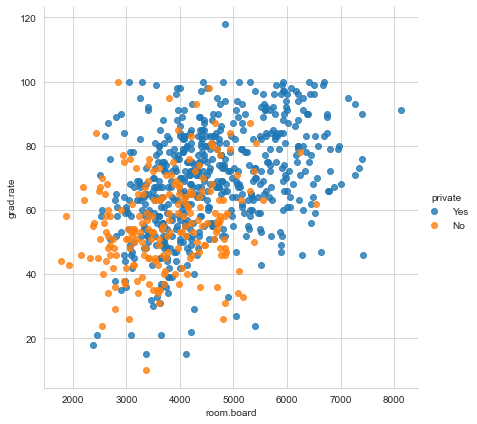

In [36]:
sns.lmplot(x = 'room.board', y = 'grad.rate', data = df, fit_reg = False, hue = 'private', size = 6,aspect = 1)

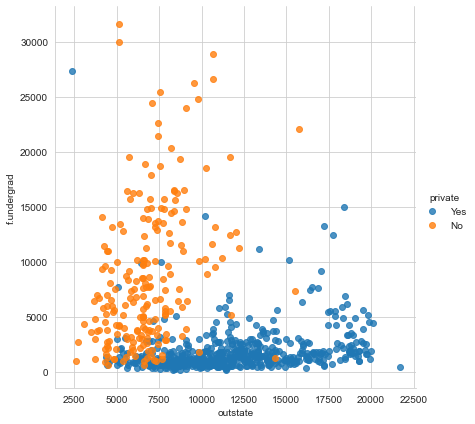

In [38]:
sns.lmplot(x = 'outstate', y = 'f.undergrad', data = df, fit_reg = False, hue = 'private', size = 6, aspect = 1)

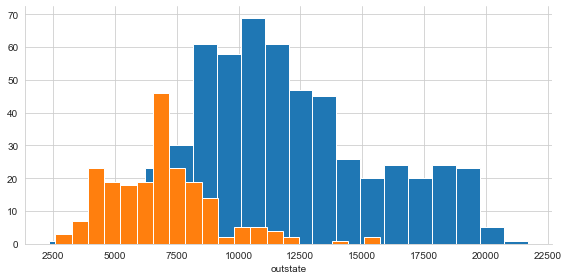

In [43]:
g = sns.FacetGrid(df, hue = 'private', size = 4, aspect = 2)
g = g.map(plt.hist, 'outstate', bins = 20)

In [44]:
X = df.iloc[:, [9,10]].values

# Apply KMeans

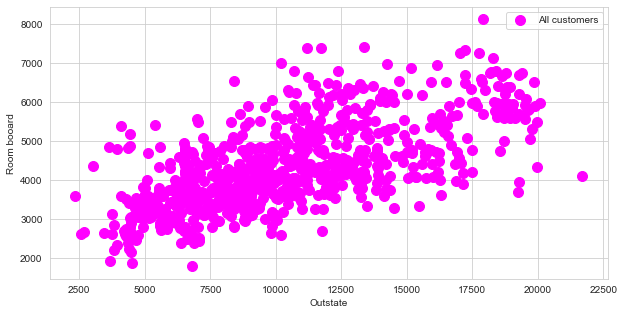

In [47]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='magenta',label='All customers')
plt.xlabel('Outstate')
plt.ylabel('Room booard')
plt.legend()
plt.show()

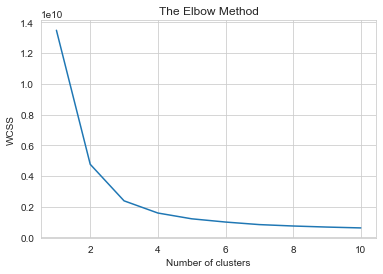

In [48]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [49]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [50]:
y_kmeans

array([2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 2,
       0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0,
       2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 1, 1,
       0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0,
       2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2,
       0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1,
       2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0,
       1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2,
       0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 0, 1, 2,

In [51]:
X[y_kmeans==0]

array([[12280,  6450],
       [11250,  3750],
       [12960,  5450],
       [13500,  3335],
       [13290,  5720],
       [13868,  4826],
       [10468,  3380],
       [ 9690,  4785],
       [12572,  4552],
       [10100,  3520],
       [ 9996,  3090],
       [11208,  4124],
       [12000,  5920],
       [11902,  4372],
       [13353,  4173],
       [10990,  3244],
       [11280,  4342],
       [ 9925,  4135],
       [10995,  4410],
       [ 9690,  4300],
       [11290,  5360],
       [12850,  5400],
       [ 9000,  4850],
       [ 9550,  3850],
       [13800,  5510],
       [11660,  4325],
       [ 9900,  3990],
       [10870,  4440],
       [ 9592,  5879],
       [10260,  3597],
       [10265,  4725],
       [13306,  3797],
       [13130,  4650],
       [10518,  6250],
       [12950,  5300],
       [10230,  3710],
       [10750,  5340],
       [13050,  4000],
       [12200,  3880],
       [13125,  3775],
       [ 9270,  4100],
       [13712,  6408],
       [ 9384,  4840],
       [114

In [52]:
kmeans.cluster_centers_

array([[11391.56230032,  4618.50479233],
       [17110.54411765,  5479.34558824],
       [ 6767.70426829,  3643.33841463]])

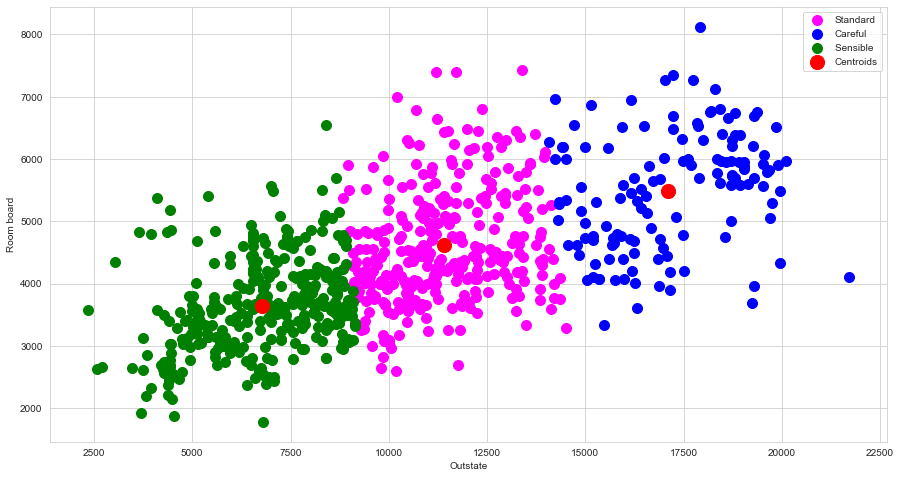

In [53]:
#Lets plot those clusters!
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='magenta',label='Standard')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Careful')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Sensible ')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
plt.xlabel('Outstate')
plt.ylabel('Room board')
plt.legend()
plt.show()
